In [1]:
!pip install PyGithub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 8.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.9/349.9 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 53.8 MB/s eta 0:00:0000:0100:01


In [50]:
import json
import codecs
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, YearLocator, DateFormatter
import numpy as np
import datetime
from github import Github
from tqdm import tqdm

In [51]:
repos_path = '/mnt/data/shared-data/lca/updated_repos_list.json'

In [52]:
search_data = json.load(codecs.open(repos_path, "r", "latin-1"))

In [53]:
search_data['parameters']

{'nameEquals': False,
 'commitsMin': 1000,
 'contributorsMin': 10,
 'issuesMin': 10,
 'pullsMin': 10,
 'starsMin': 10,
 'codeLinesMin': 10000,
 'committedMin': '2023-06-01T12:00:00',
 'excludeForks': True,
 'onlyForks': False,
 'hasIssues': True,
 'hasPulls': True,
 'hasWiki': False,
 'hasLicense': True}

In [54]:
licenses = Counter([repo["license"] for repo in search_data['items']])
licenses.most_common()

[('MIT License', 4082),
 ('Apache License 2.0', 3674),
 ('Other', 2887),
 ('GNU General Public License v3.0', 1326),
 ('BSD 3-Clause New or Revised License', 696),
 ('GNU General Public License v2.0', 631),
 ('GNU Affero General Public License v3.0', 627),
 ('Mozilla Public License 2.0', 258),
 ('GNU Lesser General Public License v3.0', 243),
 ('BSD 2-Clause Simplified License', 183),
 ('GNU Lesser General Public License v2.1', 168),
 ('ISC License', 64),
 ('Eclipse Public License 2.0', 60),
 ('Creative Commons Zero v1.0 Universal', 53),
 ('Creative Commons Attribution 4.0 International', 41),
 ('Boost Software License 1.0', 24),
 ('The Unlicense', 22),
 ('Open Software License 3.0', 22),
 ('Eclipse Public License 1.0', 21),
 ('zlib License', 19),
 ('European Union Public License 1.2', 17),
 ('Creative Commons Attribution Share Alike 4.0 International', 14),
 ('Universal Permissive License v1.0', 9),
 ('BSD Zero Clause License', 9),
 ('Educational Community License v2.0', 5),
 ('MIT No

In [55]:
print("\n".join(search_data["items"][0].keys()))

id
name
isFork
commits
branches
defaultBranch
releases
contributors
license
watchers
stargazers
forks
size
createdAt
pushedAt
updatedAt
homepage
mainLanguage
totalIssues
openIssues
totalPullRequests
openPullRequests
blankLines
codeLines
commentLines
metrics
lastCommit
lastCommitSHA
hasWiki
isArchived
languages
labels
topics


In [56]:
permissive_licenses = [
    "MIT License",
    "Apache License 2.0",
    "BSD 3-Clause New or Revised License",
    "BSD 2-Clause Simplified License",
]
search_data['items'] = [repo for repo in search_data['items'] if repo['license'] in permissive_licenses]

In [68]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_pie_chart(languages_count):
    # Calculate the total number of repositories
    total_repos = sum(languages_count.values())
    
    # Calculate the threshold for languages to be grouped into "Other"
    threshold = total_repos * 0.01
    
    # Initialize a new Counter to aggregate languages with counts below the threshold
    other_languages = Counter()
    
    # Iterate through languages_count and aggregate languages below the threshold
    for language, count in languages_count.items():
        if count < threshold:
            other_languages['Other'] += count
        else:
            other_languages[language] = count
            
    # Plotting pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(other_languages.values(), labels=other_languages.keys(), autopct=lambda p: '{:.0f}'.format(p * total_repos / 100),
            startangle=140)
    plt.title('Programming Languages Distribution in Repositories')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Example usage:
# Assuming languages_count is a Counter object containing language counts
# plot_pie_chart(languages_count)


In [70]:
print(len(search_data['items']))

8635


[('Python', 1560), ('TypeScript', 1533), ('JavaScript', 1005), ('Java', 974), ('Go', 966), ('C++', 527), ('C#', 405), ('Rust', 360), ('PHP', 278), ('Ruby', 277), ('C', 248), ('Kotlin', 145), ('Swift', 95), ('Shell', 88), ('Dart', 67), ('Elixir', 33), ('Objective-C', 31), ('Groovy', 25), ('Nix', 11), ('Smalltalk', 7)]


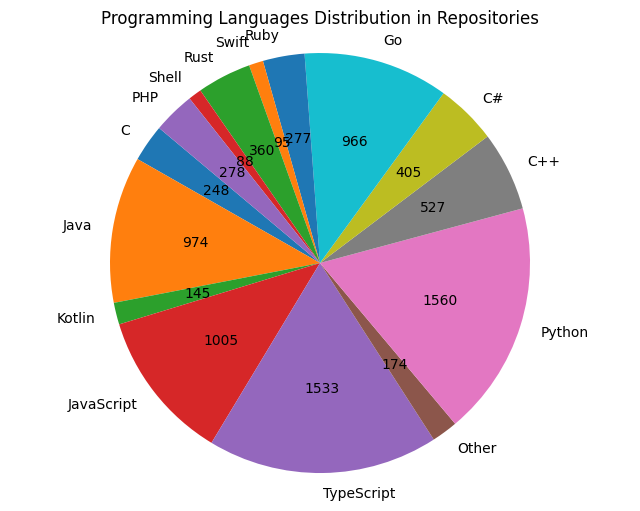

In [69]:
languages = Counter([repo["mainLanguage"] for repo in search_data['items']])
print(languages.most_common())
plot_pie_chart(languages)

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def plot_log_hist(key):
    statistic = [repo[key] for repo in search_data["items"]]

    bins = np.logspace(np.log10(min(statistic)), np.log10(max(statistic)), num=20)

    # Create histogram using log-spaced bins
    plt.figure(figsize=(10,6))
    plt.hist(statistic, bins=bins)
    plt.gca().set_xscale("log")

    # Calculate and display median
    median_val = np.median(statistic)
    plt.axvline(median_val, color='r', linestyle='dashed', linewidth=1)
    plt.text(median_val*1.1, plt.ylim()[1]*0.9, f'Median: {median_val:.2f}', color='r')

    # Calculate and display mean
    mean_val = np.mean(statistic)
    plt.axvline(mean_val, color='g', linestyle='dashed', linewidth=1)
    plt.text(mean_val*1.1, plt.ylim()[1]*0.8, f'Mean: {mean_val:.2f}', color='g')

    # Add annotations for minimum and maximum values
    min_val = np.min(statistic)
    max_val = np.max(statistic)
    plt.text(min_val, plt.ylim()[1]*0.9, f'Min: {int(min_val)}', color='b')
    plt.text(max_val*1.1, plt.ylim()[1]*0.9, f'Max: {int(max_val)}', color='b')

    # Add gridlines
    plt.grid(axis='y', linestyle='--', linewidth=0.5)

    # Set up labels and title
    plt.xlabel(f'Number of {key} (log scale)')
    plt.ylabel('Number of Repositories')
    plt.title(f'Histogram of {key} in Repositories')

    # Show the plot
    plt.show()


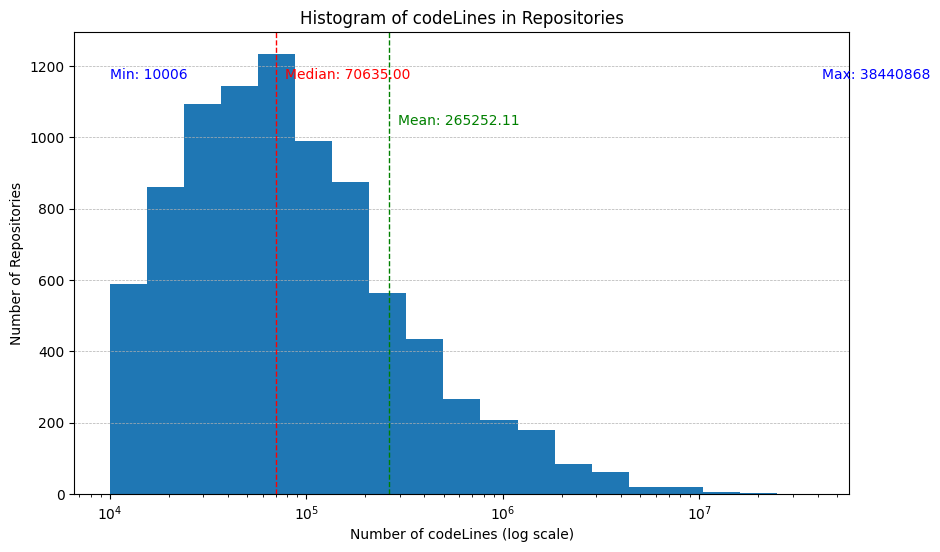

In [13]:
plot_log_hist("codeLines")

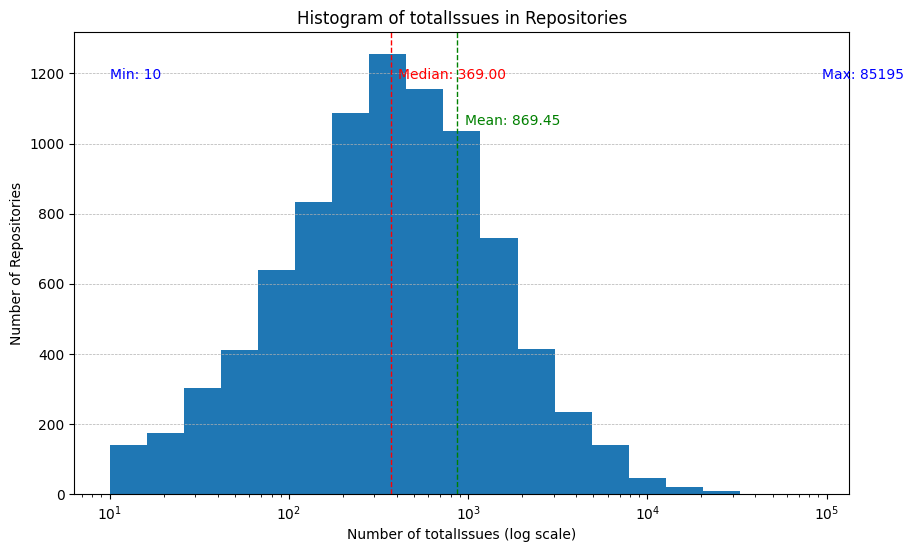

In [14]:
plot_log_hist("totalIssues")

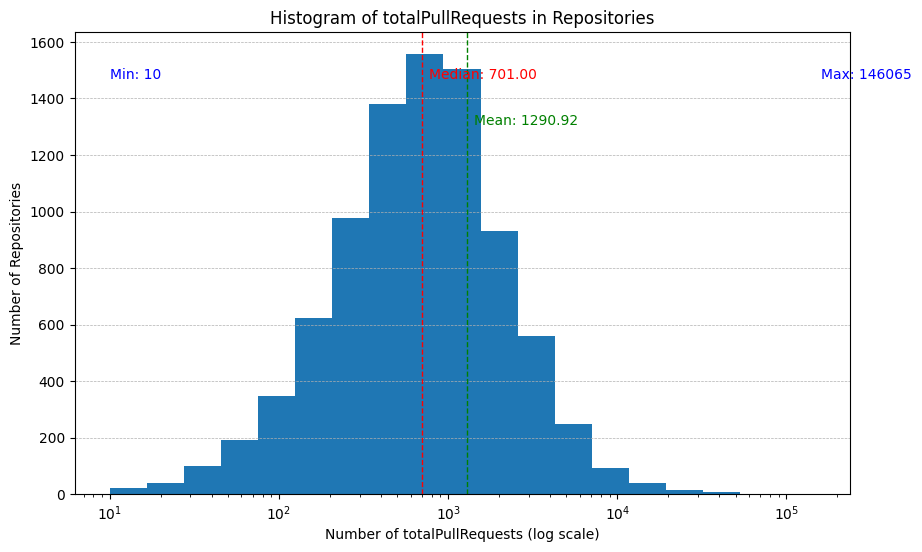

In [15]:
plot_log_hist("totalPullRequests")

In [30]:
import datetime
from matplotlib.dates import date2num, YearLocator, DateFormatter

def plot_date_hist():
    dates = [repo["createdAt"] for repo in search_data["items"]]

    # Convert strings to datetime objects
    date_objects = [datetime.datetime.strptime(date, "%Y-%m-%dT%H:%M:%S") for date in dates]

    # Convert datetime objects to numbers for plotting
    date_nums = date2num(date_objects)

    # Create histogram
    plt.figure(figsize=(10,6))
    plt.hist(date_nums, bins=20)

    # Format x-axis to show dates
    ax = plt.gca()
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_major_formatter(DateFormatter('%Y'))

    # Add vertical line for April 2023
    april_2023 = datetime.datetime(2023, 4, 1)
    ax.axvline(date2num(april_2023), color='r', linestyle='--', linewidth=1)
    
    # Add gridlines
    plt.grid(linestyle='--', linewidth=0.5)

    # Set up labels and title
    plt.xlabel('Date')
    plt.ylabel('Number of Repositories')
    plt.title('Histogram of Repositories Over Time')

    # Show the plot
    plt.show()

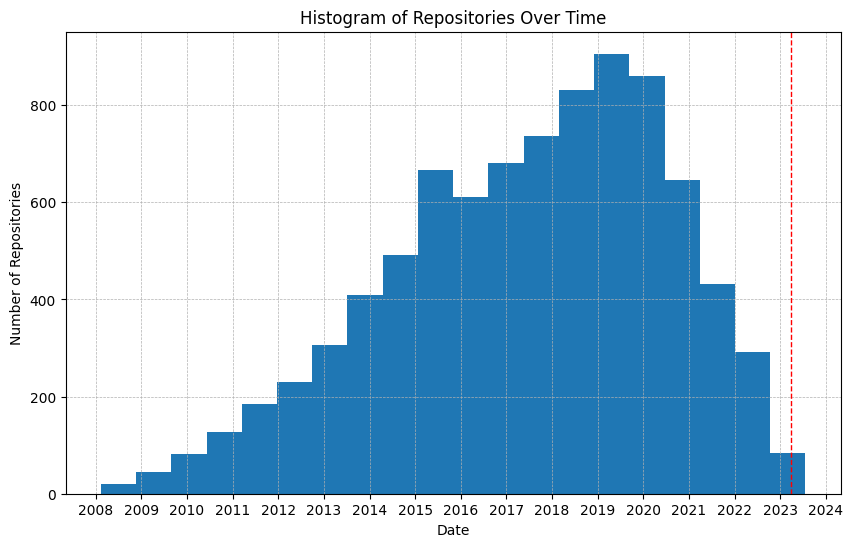

In [31]:
plot_date_hist()

In [33]:
!pip install numpy

In [71]:
import numpy as np
for key in ["totalIssues", "totalPullRequests", "codeLines", "commits"]:
    table_line = key
    statistic = [repo[key] for repo in search_data["items"]]
    min_stat = min(statistic)
    mean_stat = np.mean(statistic)
    median_stat = np.median(statistic)
    max_stat = max(statistic)
    table_line += " & {} & {} & {:.2f} & {} & {}".format(
            min(statistic), 
            int(np.median(statistic)),
            np.mean(statistic), 
            max(statistic),
            sum(statistic)
    )
    print(table_line + " \\\\")
        

totalIssues & 10 & 369 & 869.45 & 85195 & 7507729 \\
totalPullRequests & 10 & 701 & 1290.92 & 146065 & 11147081 \\
codeLines & 10006 & 70635 & 265252.11 & 38440868 & 2290452011 \\
commits & 1000 & 2254 & 4189.54 & 239825 & 36176679 \\


In [ ]:
sum()